In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from numpy import unravel_index
from sklearn import datasets, linear_model

In [2]:
df = pd.read_csv('../data/marble_game.csv')

In [ ]:
reg = KernelRidge(kernel = 'poly')
x = df.marble.values.reshape(-1, 1)
y = df.highscore
reg.fit(x ,y )

/home/andreas/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


[2.69969824e-06]


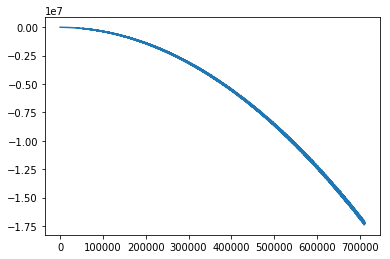

In [94]:
print(reg.predict(71144))
xp = np.linspace(0,target,100).reshape(-1, 1)
#plt.plot(df.marble,df.highscore)
plt.plot(x,reg.predict(x)-y)

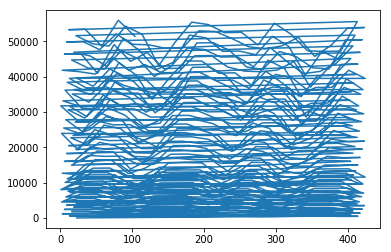

In [37]:
plt.plot(df.player[0:1000], df.highscore[0:1000])

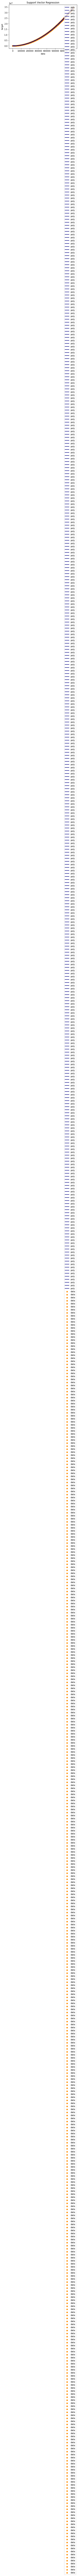

In [ ]:
poly_array = {}
for player in df.player.unique():

    x = df[df.player==player].marble[0:1000]
    X = x[:, np.newaxis]
    y = df[df.player==player].highscore[0:1000]
    y_poly = np.polyfit(np.array(x), y, 3)
    poly_array[player] = np.poly1d(y_poly)
   # print(y_poly)
   # svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
   # svr_lin = SVR(kernel='linear', C=1e3)
    #svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    #y_rbf = svr_rbf.fit(X, y).predict(X)
    #y_lin = svr_lin.fit(X, y).predict(X)
    #y_poly = svr_poly.fit(X, y).predict(X)
    lw = 2
    plt.scatter(x, y, color='darkorange', label='data')
    plt.plot(x, poly_array[player](x), color='navy', lw=lw, label='poly')
    #plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
    #plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
    plt.xlabel('data')
    plt.ylabel('target')
    plt.title('Support Vector Regression')
    plt.legend()

In [1]:
number = str(1235)

In [3]:
int(number[-3])

2

In [54]:
target = 71144
max_score = 0
best_player = 0
for player in df.player.unique():
    max_score = max(max_score,poly_array[player](target))
print(max_score)

412687.6884057526


In [58]:
405143 - max_score

-7544.6884057525895

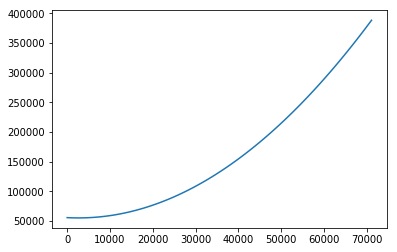

In [59]:
xp = np.linspace(0,target,100)
plt.plot(xp,poly_array[player](xp))

In [61]:
import sklearn.neural_network.MLPRegressor

ModuleNotFoundError: No module named 'sklearn.neural_network.MLPRegressor'

In [27]:
x_plot = np.linspace(0, 10, 7000000)
x = df.marble
y = df.highscore
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

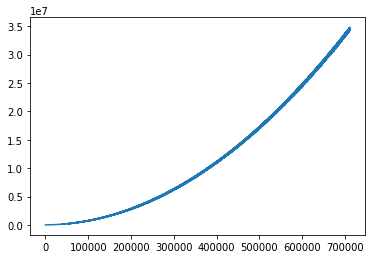

In [26]:
plt.plot(X,y)

In [ ]:
df.player.unique()

/home/andreas/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.541395e-62
  overwrite_a=True).T


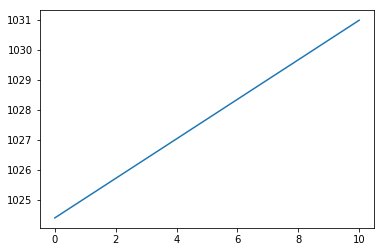

In [28]:
model = make_pipeline(PolynomialFeatures(5), Ridge())
model.fit(X, y)
y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot)

In [ ]:
 #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [37]:
grid = np.zeros((301,301),dtype=int)
grid_sum = np.zeros((301,301),dtype=int)

In [16]:
def get_hundred_digit(number):
    if number < 100:
        return 0
    numb_Str = str(number)
    return int(numb_Str[-3])


def calc_power_level(x, y, serial):
    id = x + 10
    power_level = id * y
    power_level += serial
    power_level *= id
    power_level = get_hundred_digit(power_level)
    power_level -= 5
    return power_level

In [43]:
for x in range(301):
    for y in range(301):
        grid[y,x] = calc_power_level(x,y,18)

In [44]:
for x in range(1,298):
    for y in range(1,298):
        grid_sum[y,x] = grid[y:y+3,x:x+3].sum()

In [47]:
grid_sum.max()

29

In [48]:
np.argmax(grid_sum)

13578

In [50]:
unravel_index(grid_sum.argmax(),grid_sum.shape)

(45, 33)